<a href="https://colab.research.google.com/github/nmj18txstate/EmotionDetection_and_GroupSentimentAnalysis/blob/main/Testing_Emotions_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. IMPORT THE NECESSARY LIBRARIES**

In [ ]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install tf-keras

In [ ]:
!pip install scikit-learn


In [ ]:
# Step 1: Import all the necessary libraries
import cv2
from deepface import DeepFace
# from google.colab.patches import cv2_imshow
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import csv
import json

## **2. LOAD THE ANNOTATIONS FROM THE CSV FILE INTO JUPYTER NOTEBOOK**

In [ ]:
# Step 2: Load Annotations from CSV File
def parse_annotations(csv_file):
    annotations = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            image_path = row['image']
            label_data = row['label']
            if label_data.strip() == '':
                continue
            try:
                label_data_json = json.loads(label_data)
                for item in label_data_json:
                    x = item['x']
                    y = item['y']
                    width = item['width']
                    height = item['height']
                    label = item['rectanglelabels'][0]  # Assuming only one label per annotation
                    annotations.append({
                        'image_path': image_path,
                        'label': label,
                        'x': x,
                        'y': y,
                        'width': width,
                        'height': height
                    })
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON data: {e}")
                print(f"Problematic JSON data: {label_data}")
    return annotations

   annotation_id  annotator                   created_at  id  \
0             10          1  2024-05-22T00:01:37.148419Z   1   
1             11          1  2024-05-22T00:12:00.291765Z   2   
2             12          1  2024-05-22T00:13:01.809371Z   3   
3             13          1  2024-05-22T00:20:56.890083Z   4   
4             14          1  2024-05-22T00:23:22.048231Z   5   

                                  image  \
0             0_Parade_Parade_0_226.jpg   
1  0bded59ce9df43258c9efb469aad7a37.jpg   
2  0d837dd8fd764cbf98dd135b42193ef1.jpg   
3  0feb3d90a46b426998d98f5e02aefa00.jpg   
4  1af92e2f98ae44e88c09663d1c1e7b09.jpg   

                                               label  lead_time  \
0  [{"points":[[50.75683876305738,23.848652525630...    220.344   
1  [{"points":[[44.31324018035674,29.276320792351...    215.346   
2  [{"points":[[17.28796404309339,28.782894736842...     50.683   
3  [{"points":[[9.100877192982457,82.565789473684...    469.777   
4  [{"points":[[57.07

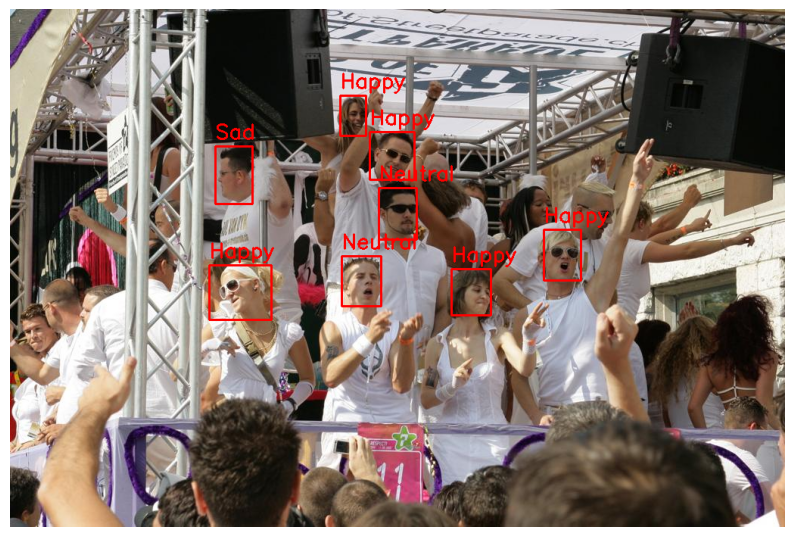

Coordinates: (372.6743499168002, 145.78950140015607) to (460.1480341273265, 245.10858034752448)
Coordinates: (537.5986842105264, 385.4309210526316) to (639.6513157894736, 507.52960526315786)
Coordinates: (225.06249999999997, 304.3355263157895) to (278.82236842105266, 369.02960526315786)
Coordinates: (109.34210526315788, 243.28618421052633) to (156.7236842105263, 300.6907894736842)
Coordinates: (206.83881578947367, 389.0756578947369) to (274.266447368421, 475.6381578947369)
Coordinates: (672.453947368421, 423.7006578947369) to (774.5065789473684, 550.3552631578948)
Coordinates: (706.1677631578947, 236.9078947368421) to (738.9703947368421, 299.77960526315786)
Coordinates: (794.5526315789475, 338.0493421052632) to (840.111842105263, 420.96710526315786)


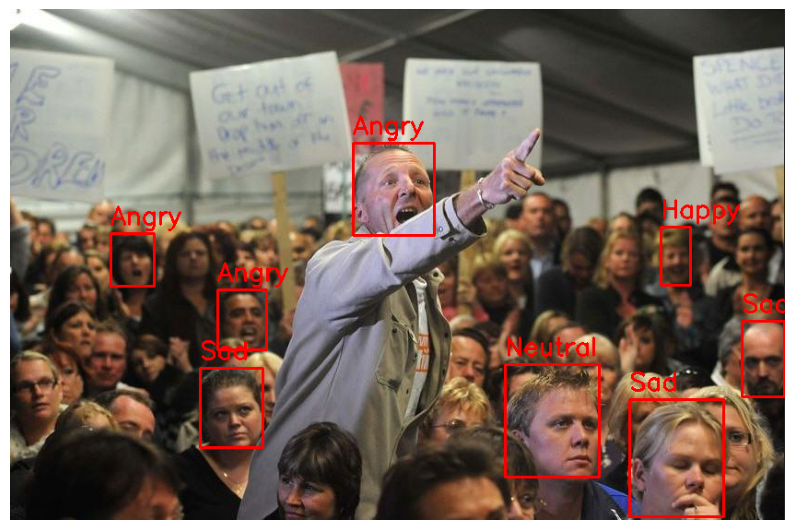

Coordinates: (132.5986842105263, 52.125) to (326.4671052631579, 248.73684210526318)
Coordinates: (571.546052631579, 118.88157894736841) to (712.375, 287.1447368421053)


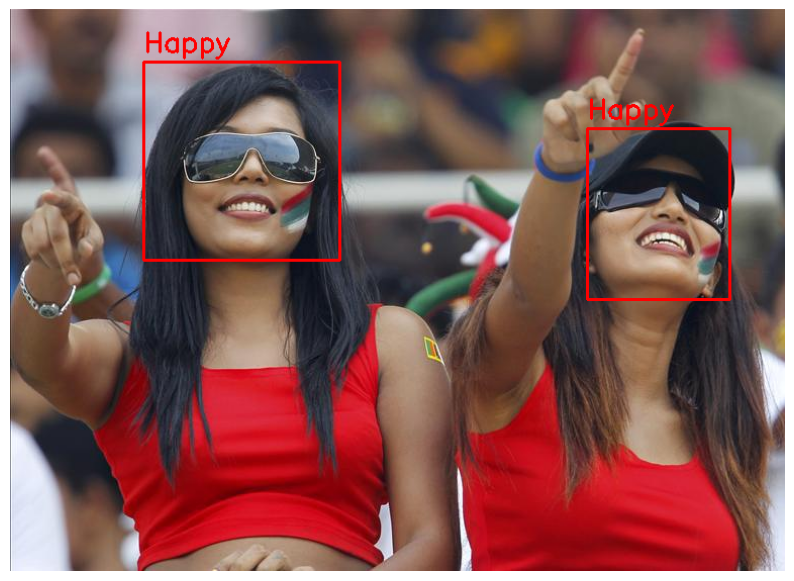

Coordinates: (51.74999999999999, 340.4605263157895) to (83.75328947368422, 379.2730263157895)
Coordinates: (168.1875, 168.86842105263156) to (197.46710526315786, 207.0)
Coordinates: (440.5559210526315, 290.7532894736842) to (472.5592105263158, 334.33223684210526)
Coordinates: (262.8355263157894, 159.33552631578948) to (290.07236842105266, 200.1907894736842)
Coordinates: (420.8092105263158, 22.47039473684211) to (446.0032894736842, 59.240131578947356)
Coordinates: (401.7434210526315, 359.52631578947376) to (433.7467105263158, 396.29605263157896)
Coordinates: (215.17105263157896, 296.2006578947368) to (244.45065789473682, 336.375)
Coordinates: (-0.6809210526315789, 235.5986842105263) to (16.342105263157894, 280.5394736842106)
Coordinates: (88.51973684210526, 206.31907894736844) to (117.79934210526315, 252.6217105263158)
Coordinates: (530.4374999999999, 344.54605263157896) to (556.9934210526316, 379.2730263157895)
Coordinates: (379.95394736842104, 66.73026315789474) to (407.8717105263158,

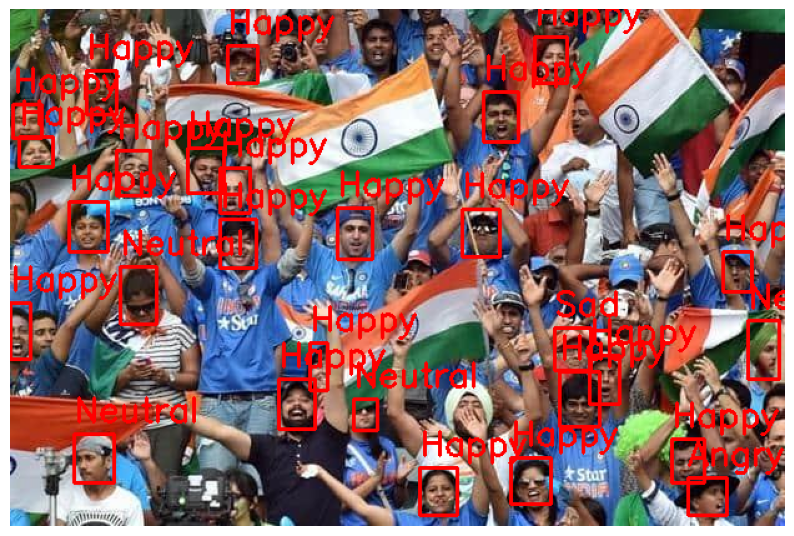

Coordinates: (520.4736842105264, 192.93421052631575) to (619.1842105263158, 315.2006578947368)
Coordinates: (1.1217297590532143, 132.3617852392137) to (179.47370344326373, 339.8782326076347)
Coordinates: (852.5, 232.19407894736847) to (924.2894736842105, 323.05263157894734)
Coordinates: (456.53618421052636, 75.15460526315788) to (519.3519736842105, 151.4309210526316)
Coordinates: (546.2730263157895, 63.9375) to (615.8190789473684, 145.82236842105263)
Coordinates: (220.97697368421052, 217.61184210526318) to (334.26973684210526, 390.3552631578947)
Coordinates: (429.6151315789474, 173.86513157894734) to (519.3519736842105, 332.02631578947364)


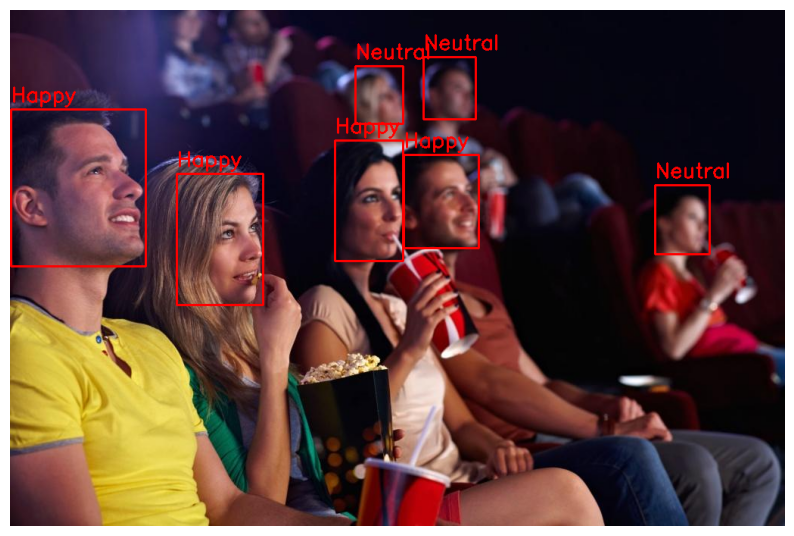

In [ ]:
import cv2
from deepface import DeepFace
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file with annotations
csv_file_path = 'C:/Nityam/IK_ML/Mini Project_DL/Emotion Detection/project-1-updated.csv'
annotations = pd.read_csv(csv_file_path)

# Print the first few rows of the CSV to inspect the structure
print(annotations.head())

# Print the contents of the 'label' field for the first row
print("Contents of 'label' field for the first row:")
print(annotations.iloc[0]['label'])

def parse_annotations(row, img_width, img_height):
    """
    Parse the annotations from the row to extract bounding box coordinates and labels.
    """
    annotations = json.loads(row['label'])
    parsed_annotations = []
    for annotation in annotations:
        points = annotation['points']
        label = annotation['polygonlabels'][0]  # Use 'polygonlabels' instead of 'labels'
        x_coords = [p[0] * img_width / 100 for p in points]  # Scale based on image width
        y_coords = [p[1] * img_height / 100 for p in points]  # Scale based on image height
        x1, y1, x2, y2 = min(x_coords), min(y_coords), max(x_coords), max(y_coords)
        parsed_annotations.append(((x1, y1, x2, y2), label))
    return parsed_annotations

def visualize_results(image_path, annotations):
    """
    Visualize the results with bounding boxes and labels.
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Image not found: {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_height, img_width = image.shape[:2]
    for (x1, y1, x2, y2), label in annotations:
        print(f"Coordinates: ({x1}, {y1}) to ({x2}, {y2})")  # Debugging print
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Iterate over each row and process the annotations
for index, row in annotations.iterrows():
    image_path = row['image']
    image_full_path = os.path.join('C:/Nityam/IK_ML/Mini Project_DL/Emotion Detection/', image_path)
    image = cv2.imread(image_full_path)
    if image is None:
        print(f"Image not found: {image_full_path}")
        continue
    img_height, img_width = image.shape[:2]
    parsed_annotations = parse_annotations(row, img_width, img_height)
    visualize_results(image_full_path, parsed_annotations)


## **3. FACIAL RECOGNITION USING HAARCASCADE ALGORITHM**

In [ ]:
# Step 3: Facial Recognition
def detect_faces(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces, image

## **4. EMOTION DETECTION FOR EACH INDIVIDUAL USING THE DEEPFACE LIBRARY**

In [ ]:
# Step 4: Emotion Detection for Individuals
def perform_object_detection_emotion_recognition(image_path, annotations):
    faces, image = detect_faces(image_path)
    individual_emotions = detect_emotions(image_path, faces)
    group_emotion = majority_voting(individual_emotions)
    return faces, individual_emotions, group_emotion

def detect_emotions(image_path, faces):
    image = cv2.imread(image_path)
    emotions = []
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        emotion = DeepFace.analyze(face, actions=['emotion'], enforce_detection=False)
        dominant_emotion = emotion[0]['dominant_emotion']
        emotions.append(dominant_emotion)
    return emotions

## **5. MAJORITY VOTING TO DETECT GROUP EMOTIONAL STATE**

In [ ]:
# Step 5: Majority Voting for Group Emotion
def majority_voting(emotions):
    emotion_count = {}
    for emotion in emotions:
        if emotion in emotion_count:
            emotion_count[emotion] += 1
        else:
            emotion_count[emotion] = 1
    majority_emotion = max(emotion_count, key=emotion_count.get)
    return majority_emotion

## **6. EVALUATING THE PREDICTIONS**

In [ ]:
# Step 6: Evaluate Predictions
def evaluate_predictions(ground_truth_annotations, detected_faces, detected_emotions):
    # Compute evaluation metrics
    ground_truth_labels = [annotation['label'] for annotation in ground_truth_annotations]
    accuracy = accuracy_score(ground_truth_labels, detected_emotions)
    precision = precision_score(ground_truth_labels, detected_emotions, average='macro')
    recall = recall_score(ground_truth_labels, detected_emotions, average='macro')
    f1 = f1_score(ground_truth_labels, detected_emotions, average='macro')

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

## **6. CALCULATING THE INTERSECTION OVER UNION (IOU)**

In [ ]:
# Step 7: Calculate Intersection over Union (IoU)
def calculate_iou(bbox1, bbox2):
    x1 = max(bbox1['x'], bbox2[0])
    y1 = max(bbox1['y'], bbox2[1])
    x2 = min(bbox1['x'] + bbox1['width'], bbox2[0] + bbox2[2])
    y2 = min(bbox1['y'] + bbox1['height'], bbox2[1] + bbox2[3])

    # Calculate intersection area
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Calculate areas of the bounding boxes
    bbox1_area = bbox1['width'] * bbox1['height']
    bbox2_area = bbox2[2] * bbox2[3]

    # Calculate union area
    union_area = bbox1_area + bbox2_area - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area if union_area != 0 else 0
    return iou

def evaluate_iou(annotations, detected_faces):
    ious = []
    for annotation in annotations:
        ground_truth_bbox = {
            'x': annotation['x'],
            'y': annotation['y'],
            'width': annotation['width'],
            'height': annotation['height']
        }
        for detected_face in detected_faces:
            detected_bbox = (detected_face[0], detected_face[1], detected_face[2], detected_face[3])
            iou = calculate_iou(ground_truth_bbox, detected_bbox)
            ious.append(iou)

    # Calculate average IoU
    average_iou = sum(ious) / len(ious) if ious else 0
    print("Average IoU:", average_iou)

## **7. VISUALIZING THE RESULTS**

In [ ]:
# Step 8: Visualize Results
def visualize_faces(image, faces, emotions):
    for (i, (x, y, w, h)) in enumerate(faces):
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        emotion_text = emotions[i]
        cv2.putText(image, emotion_text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return image

def visualize_results(image, faces, emotions):
    # Visualize the detected faces and emotions
    annotated_image = visualize_faces(image, faces, emotions)
    cv2_imshow(annotated_image)

## **8. CALL THE FUNCTIONS**

In [ ]:
#Step 9: Call all the functions

# Load annotations from CSV
csv_file_path =  r'C:\Nityam\IK_ML\Mini Project_DL\Emotion Detection\project-1-updated.csv'
annotations = parse_annotations(csv_file_path)

# Example usage
image_path = r'C:\Nityam\IK_ML\Mini Project_DL\Emotion Detection\0_Parade_Parade_0_226.jpg'
faces, individual_emotions, group_emotion = perform_object_detection_emotion_recognition(image_path, annotations)

# Print detected individual emotions and group emotion
print("Individual Emotions:", individual_emotions)
print("Group Emotion:", group_emotion)

# Evaluate predictions
evaluate_predictions(annotations, faces, individual_emotions)

# Evaluate IoU
evaluate_iou(annotations, faces)

# Visualize results (Optional)
image = cv2.imread(image_path)
visualize_results(image, faces, individual_emotions)

TypeError: parse_annotations() missing 2 required positional arguments: 'img_width' and 'img_height'